# TASK_3
## Songs recommendation
### Done by :- Vatsavai Vinay Varma 

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

## Reading data set using pandas

In [3]:
tracks = pd.read_csv("C:\\Users\\vinnu\\OneDrive\\Desktop\\tcc_ceds_music.csv")
tracks.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [4]:
tracks.shape

(28372, 31)

In [5]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

## checking null values

In [6]:
tracks.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

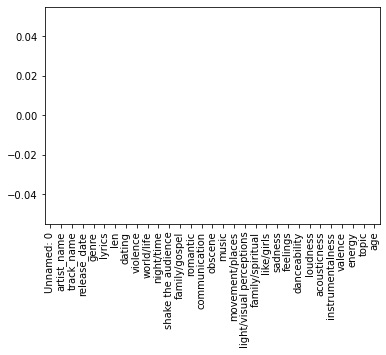

In [7]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

In [8]:
tracks['track_name'].nunique(), tracks.shape

(23689, (28372, 31))

## Sorting the tracks

In [9]:
tracks = tracks.sort_values(by=['danceability'], ascending=False)
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

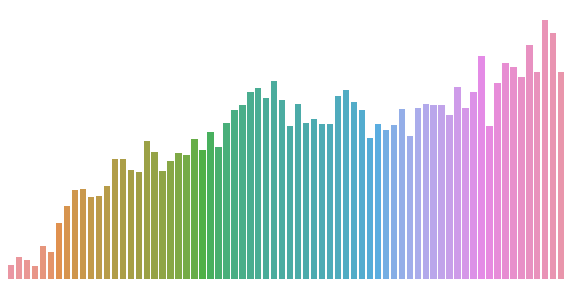

In [10]:
plt.figure(figsize = (10, 5))
sb.countplot(tracks['release_date'])
plt.axis('off')
plt.show()


In [11]:

floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)
 
len(floats)

23

In [21]:
plt.subplots(figsize = (15, 10))
for i, col in enumerate(floats):
 plt.subplot(2, 5, i + 1)
 sb.distplot(tracks[col])
plt.tight_layout()
plt.show()


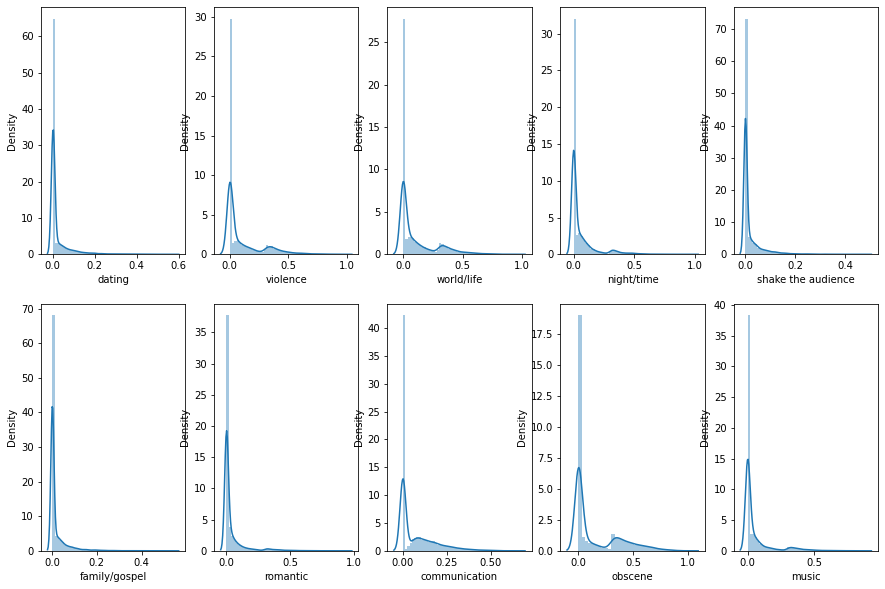

In [15]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['artist_name'])

In [16]:
tracks = tracks.sort_values(by=['danceability'], ascending=False).head(10000)


## calculating similarities between given song and all songs

In [17]:
def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['artist_name']).toarray()
  num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['track_name']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['track_name']==name]['artist_name']).toarray()
    num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

## Function to recommend songs

In [18]:
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['track_name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'danceability'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artist_name']][2:7])

In [19]:
recommend_songs('bunny hop')

,track_name,artist_name
28287,prima donna,vince staples
28243,blunts,nice & smooth
28346,sick & tired,nappy roots
28349,gook,denzel curry
28265,on fire,tone-loc
